In [1]:
import os
import sys
import pandas as pd
import numpy as np


CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
PROJ_ROOT = os.path.join(CURR_PATH, os.pardir)
ROOT =  os.path.join(PROJ_ROOT, os.path.pardir, os.path.pardir)
DATA_IM = os.path.join(PROJ_ROOT, "data","intermediate")
DATA_PRED = os.path.join(PROJ_ROOT, "data","prediction")
sys.path.append(os.path.join(ROOT,'modules'))
FIGURES = os.path.join(PROJ_ROOT, "reports","figures")

import style as style
style.set_style()
import plot_backtest as pb
from backtesting import BackTesting as BT

Style set


In [2]:
quote = 'SKA-B'
interval = '1d'
period = '3Y'

file = 'pred-' + quote + '-' + interval + '-' + period + '.pkl'
print('loading file:', file)
df = pd.read_pickle(os.path.join(DATA_PRED, file))
print(df.tail())

loading file: pred-SKA-B-1d-3Y.pkl
                     y_open_close_days_4  xg_boost
datetime                                          
2018-03-05 17:30:00             5.741775  0.848557
2018-03-06 17:30:00                  NaN  0.440739
2018-03-07 17:30:00                  NaN  0.246082
2018-03-08 17:30:00                  NaN  0.415604
2018-03-09 17:30:00                  NaN  0.331586


In [38]:
quote = 'SKA-B'
interval = '1d'
period = '3Y'

file = 'feat-' + quote + '-' + interval + '-' + period + '.pkl'
print('loading file:', file)
df = pd.read_pickle(os.path.join(DATA_IM, file))
print(df.tail())

loading file: feat-SKA-B-1d-3Y.pkl
                     stock    open    high     low   close     volume  \
datetime                                                                
2018-03-05 17:30:00  SKA-B  161.10  164.15  161.10  163.50  1279016.0   
2018-03-06 17:30:00  SKA-B  164.50  165.80  163.70  164.40  1362789.0   
2018-03-07 17:30:00  SKA-B  164.35  164.40  161.70  162.85  1668351.0   
2018-03-08 17:30:00  SKA-B  163.15  168.25  162.90  167.95  1490855.0   
2018-03-09 17:30:00  SKA-B  167.80  171.65  167.05  170.35  1687639.0   

                      x_volume  x_close_open  x_open_open_days_1  \
datetime                                                           
2018-03-05 17:30:00  1626054.0      0.000000           -0.983405   
2018-03-06 17:30:00  1279016.0      0.611621            2.110490   
2018-03-07 17:30:00  1362789.0     -0.030414           -0.091185   
2018-03-08 17:30:00  1668351.0      0.184219           -0.730149   
2018-03-09 17:30:00  1490855.0     -0.089312 

In [39]:
df.columns

Index(['stock', 'open', 'high', 'low', 'close', 'volume', 'x_volume',
       'x_close_open', 'x_open_open_days_1', 'x_open_open_day_1',
       'x_low_high_days_1', 'x_low_high_day_1', 'x_open_open_days_2',
       'x_open_open_day_2', 'x_low_high_days_2', 'x_low_high_day_2',
       'x_open_open_days_3', 'x_open_open_day_3', 'x_low_high_days_3',
       'x_low_high_day_3', 'x_open_open_days_4', 'x_open_open_day_4',
       'x_low_high_days_4', 'x_low_high_day_4', 'x_open_open_days_5',
       'x_open_open_day_5', 'x_low_high_days_5', 'x_low_high_day_5',
       'x_open_open_days_6', 'x_open_open_day_6', 'x_low_high_days_6',
       'x_low_high_day_6', 'x_open_open_days_7', 'x_open_open_day_7',
       'x_low_high_days_7', 'x_low_high_day_7', 'x_open_open_days_8',
       'x_open_open_day_8', 'x_low_high_days_8', 'x_low_high_day_8',
       'x_open_open_days_9', 'x_open_open_day_9', 'x_low_high_days_9',
       'x_low_high_day_9', 'x_open_open_days_10', 'x_open_open_day_10',
       'x_low_high_day

In [34]:
col = ['stock','open', 'high', 'low', 'close', 'volume', 'x_open_open_days_1','x_open_open_days_7_9']
df[col].head(20)

,stock,open,high,low,close,volume,x_open_open_days_1,x_open_open_days_7_9
datetime,,,,,,,,
2015-03-12 17:30:00,SKA-B,199.6,200.8,198.1,198.8,883514.0,NaN,NaN
2015-03-13 17:30:00,SKA-B,199.3,200.4,195.9,199.7,1348595.0,-0.150301,NaN
2015-03-16 17:30:00,SKA-B,199.7,201.7,199.7,201.0,1180208.0,0.200702,NaN
2015-03-17 17:30:00,SKA-B,200.9,201.5,196.5,198.5,1143554.0,0.600901,NaN
2015-03-18 17:30:00,SKA-B,198.6,201.5,195.5,200.0,1873825.0,-1.144848,NaN
2015-03-19 17:30:00,SKA-B,200.8,203.2,198.8,199.8,1173952.0,1.107754,NaN
2015-03-20 17:30:00,SKA-B,199.8,200.2,198.7,200.0,1390302.0,-0.498008,NaN
2015-03-23 17:30:00,SKA-B,199.9,199.9,198.1,198.4,783321.0,0.050050,NaN
2015-03-24 17:30:00,SKA-B,196.6,198.7,195.6,198.2,925502.0,-1.650825,NaN


In [47]:
df.iloc[10]

stock                            SKA-B
open                               190
high                             190.4
low                              187.3
close                            190.3
volume                     1.92766e+06
x_volume                    2.1003e+06
x_close_open                 -0.835073
x_open_open_days_1            -3.99192
x_open_open_day_1             -3.99192
x_low_high_days_1              4.14046
x_low_high_day_1               4.14046
x_open_open_days_2            -3.35707
x_open_open_day_2             0.661241
x_low_high_days_2              1.58487
x_low_high_day_2               1.58487
x_open_open_days_3            -4.95248
x_open_open_day_3             -1.65083
x_low_high_days_3             0.302877
x_low_high_day_3              0.908632
x_open_open_days_4             -4.9049
x_open_open_day_4            0.0500501
x_low_high_days_4                    0
x_low_high_day_4              0.754907
x_open_open_days_5            -5.37849
x_open_open_day_5        

In [40]:
from backtesting import BackTesting as BT
from machine_learning import MachineLearning as ML
ml = ML()

In [41]:
xvar = [x for x in df.columns if x.startswith('x_')]
pred_var = 'y_open_close_days_' + str(4)
pred_var_bool = pred_var + '_up'

result = df[pred_var]
clf = 'xg_boost'

mla = ml.set_classifier(clf)
bt = BT(clf=mla, data=df[xvar+[pred_var_bool]])
bt.set_output_variable(pred_var_bool)
bt.run_backtest(start_row=600)
df_pred = bt.get_result().dropna()
pred = df_pred.rename(clf)

result = pd.concat([result, pred], axis=1)
model = bt.get_classifier()

                      x_volume  x_close_open  x_open_open_days_1  \
datetime                                                           
2015-03-12 17:30:00        NaN           NaN                 NaN   
2015-03-13 17:30:00   883514.0      0.251509           -0.150301   
2015-03-16 17:30:00  1348595.0      0.000000            0.200702   
2015-03-17 17:30:00  1180208.0     -0.049751            0.600901   
2015-03-18 17:30:00  1143554.0      0.050378           -1.144848   

                     x_open_open_day_1  x_low_high_days_1  x_low_high_day_1  \
datetime                                                                      
2015-03-12 17:30:00                NaN                NaN               NaN   
2015-03-13 17:30:00          -0.150301           1.362948          1.362948   
2015-03-16 17:30:00           0.200702           2.297090          2.297090   
2015-03-17 17:30:00           0.600901           1.001502          1.001502   
2015-03-18 17:30:00          -1.144848           

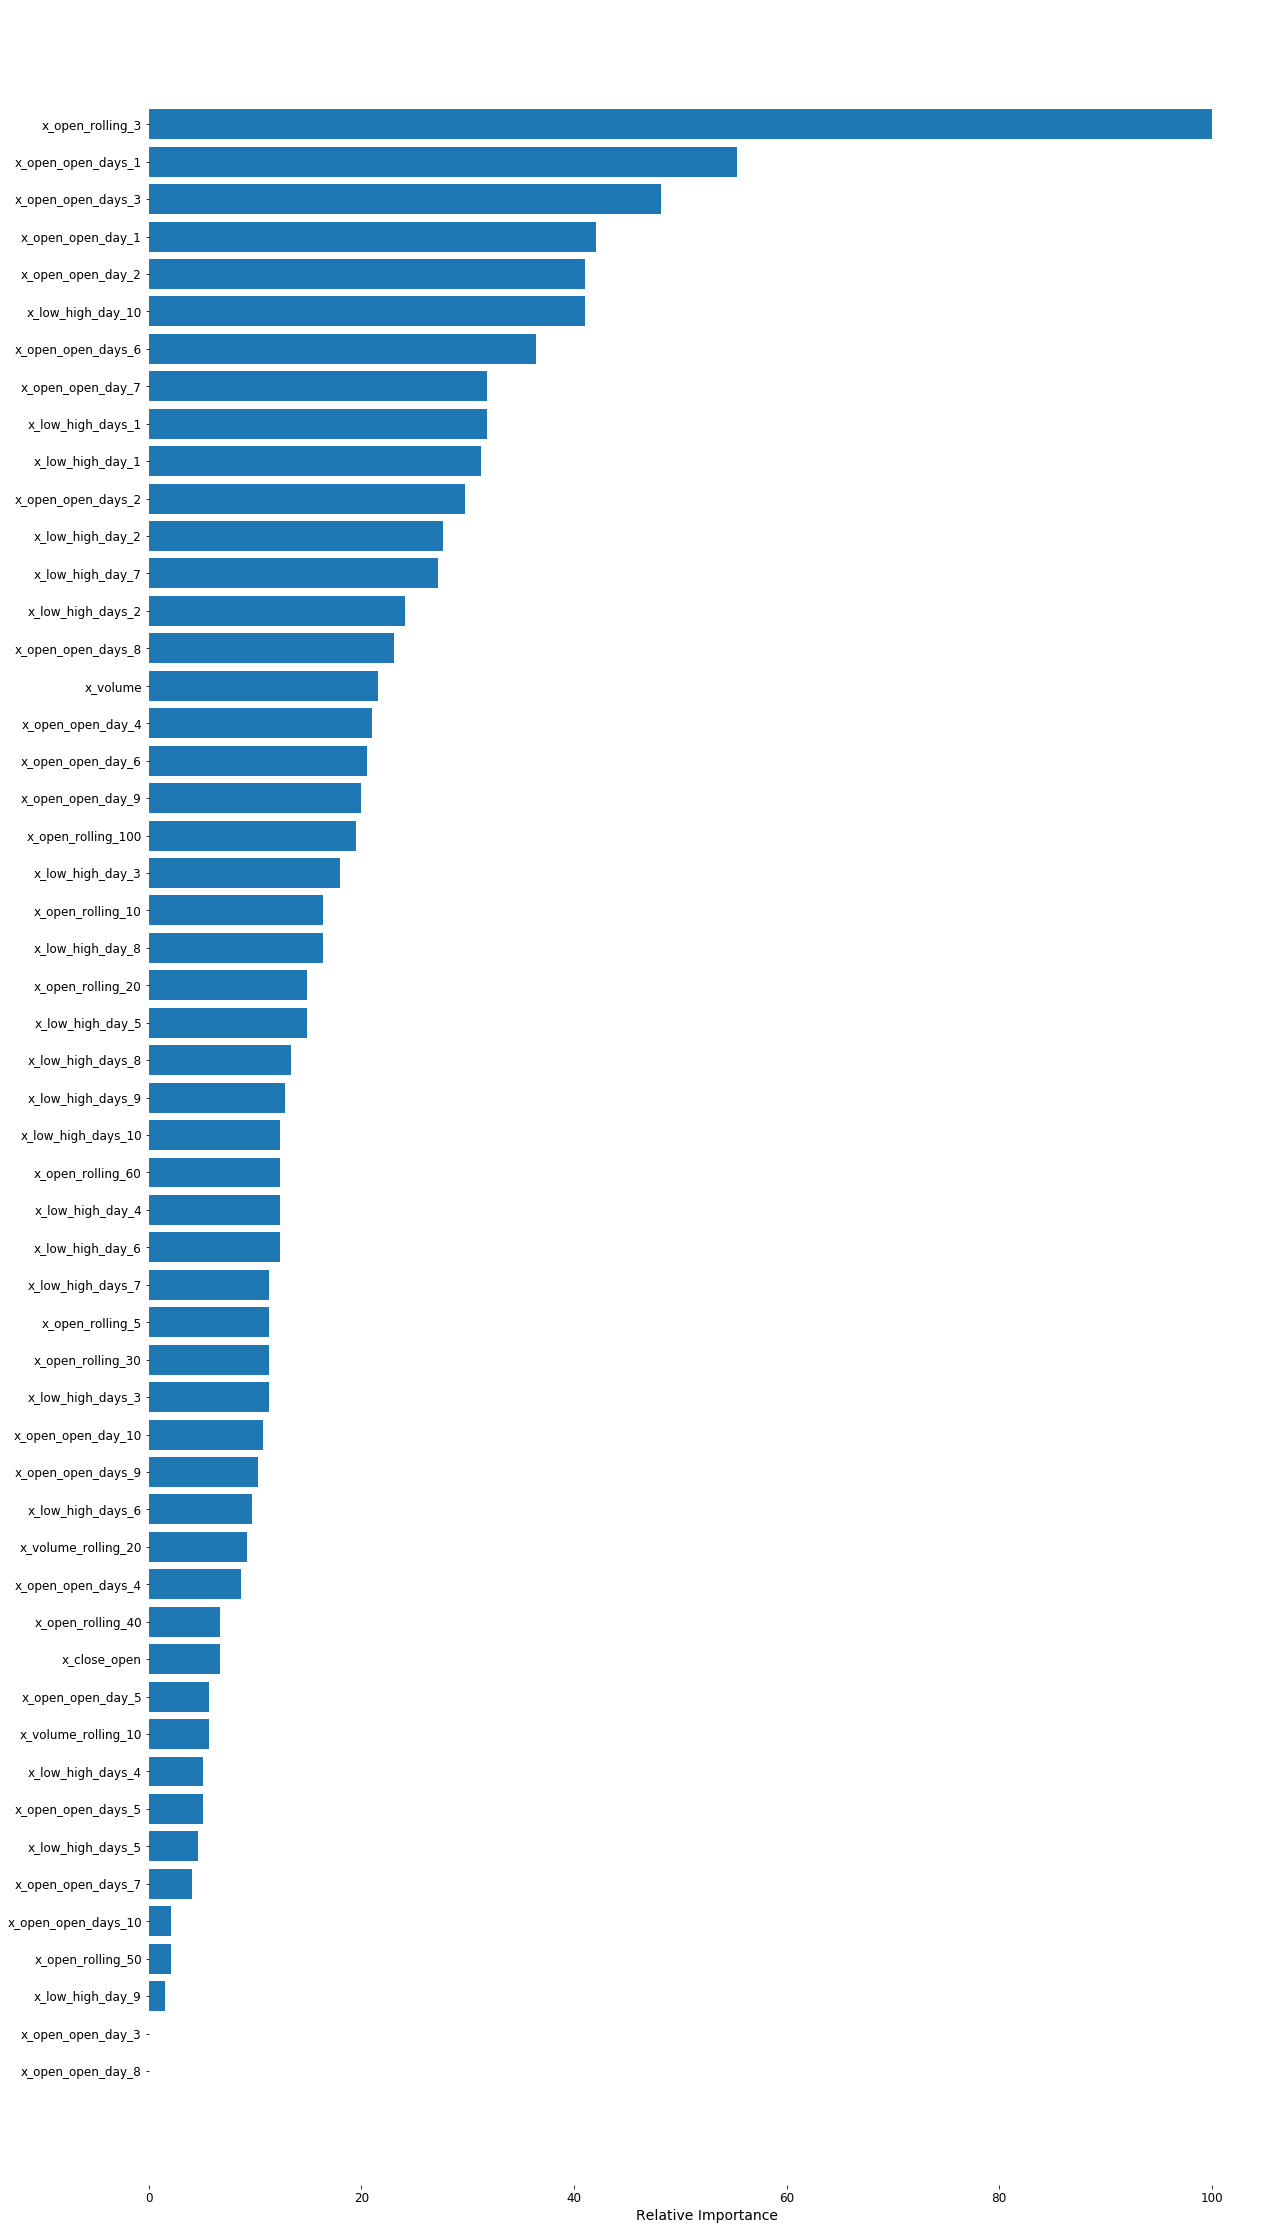

In [45]:
clf = bt.get_classifier()
feature_importance(clf, xvar, (20,40))

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
def feature_importance(clf, x_var, figsize):
    # Plot feature importance
    f, ax = plt.subplots(1, 1, figsize=figsize)
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)

    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(x_var)[sorted_idx])
    plt.xlabel('Relative Importance')
    #plt.title(stock + ' | Feature Importance')